In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv("netflix_titles.csv")
df_original = df.copy()
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
# Changing all the directors with null values to be Unknown
df['director'] = df['director'].fillna('Unknown')

# Splitting the Date column
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year.fillna(df['release_year'])
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['year_added'].fillna(0).astype(int)
df = df[df['year_added'] >= 2005]

# Splitting the duration column so we can differentiate a Movie from a Tv Show
def convert_duration(x):
    if "min" in x:
        return int(x.replace(" min",""))
    elif "Season" in x:
        return int(x.split()[0])
    return None
df['duration_num'] = df['duration'].apply(convert_duration)
df['duration_min'] = df.apply(lambda x: x['duration_num'] if x['type']=="Movie" else None, axis=1)
df['duration_seasons'] = df.apply(lambda x: x['duration_num'] if x['type']=="TV Show" else None, axis=1)

# Duplicating the rows that have more than 1 country in it and splitting the countries
df['country'] = df['country'].fillna('Unknown')
df = df.assign(country=df['country'].str.split(',\s*')).explode('country')
df['country'] = df['country'].str.strip()

# The same here for the Listed in column
df = df.assign(listed_in=df['listed_in'].str.split(', ')).explode('listed_in')

# Usless columns
df = df.drop(columns=['show_id', 'cast', 'description'])


df = df.reset_index(drop=True)
df.head()

<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3258038086.py:24: SyntaxWarning: invalid escape sequence '\s'
  df = df.assign(country=df['country'].str.split(',\s*')).explode('country')


,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,duration_num,duration_min,duration_seasons
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby",United States,2019-09-09,2019,TV-PG,90 min,Children & Family Movies,2019,9.0,90,90.0,NaN
1,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby",United States,2019-09-09,2019,TV-PG,90 min,Comedies,2019,9.0,90,90.0,NaN
2,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby",India,2019-09-09,2019,TV-PG,90 min,Children & Family Movies,2019,9.0,90,90.0,NaN
3,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby",India,2019-09-09,2019,TV-PG,90 min,Comedies,2019,9.0,90,90.0,NaN
4,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby",South Korea,2019-09-09,2019,TV-PG,90 min,Children & Family Movies,2019,9.0,90,90.0,NaN


/tmp/ipython-input-3851371257.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_original, x="type", palette="Set2")


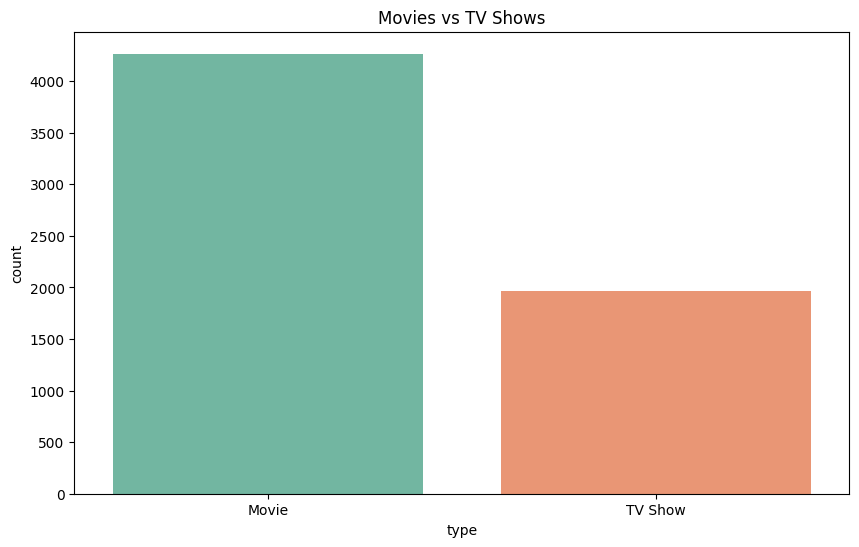

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_original, x="type", palette="Set2")
plt.title("Movies vs TV Shows")
plt.show()

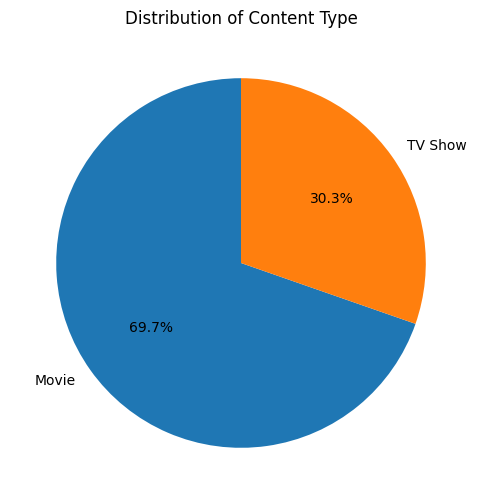

In [24]:
type_counts = df['type'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Content Type')
plt.show()


/tmp/ipython-input-838075648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


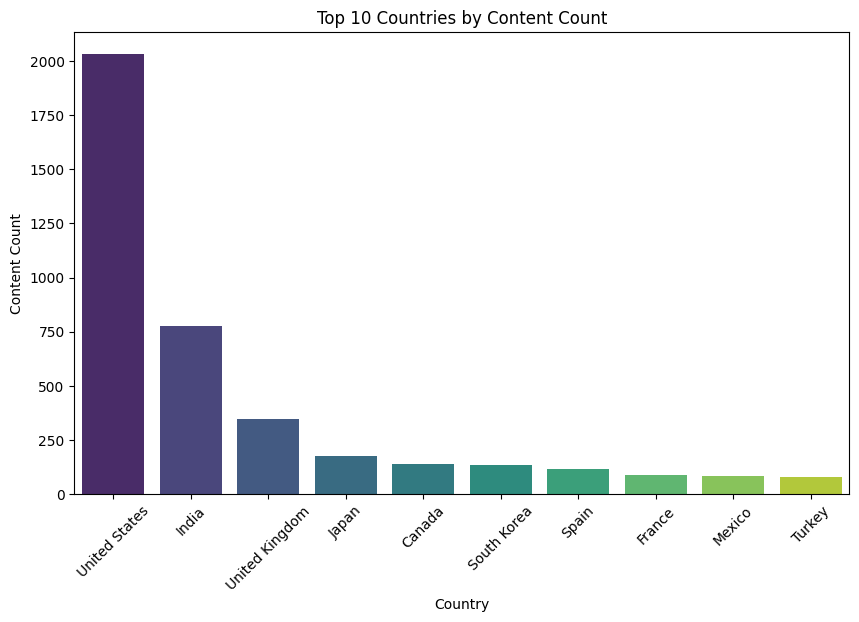

In [25]:
top_countries = df_original['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Content Count')
plt.xlabel('Country')
plt.ylabel('Content Count')
plt.show()


/tmp/ipython-input-3494700909.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.values, palette='magma')


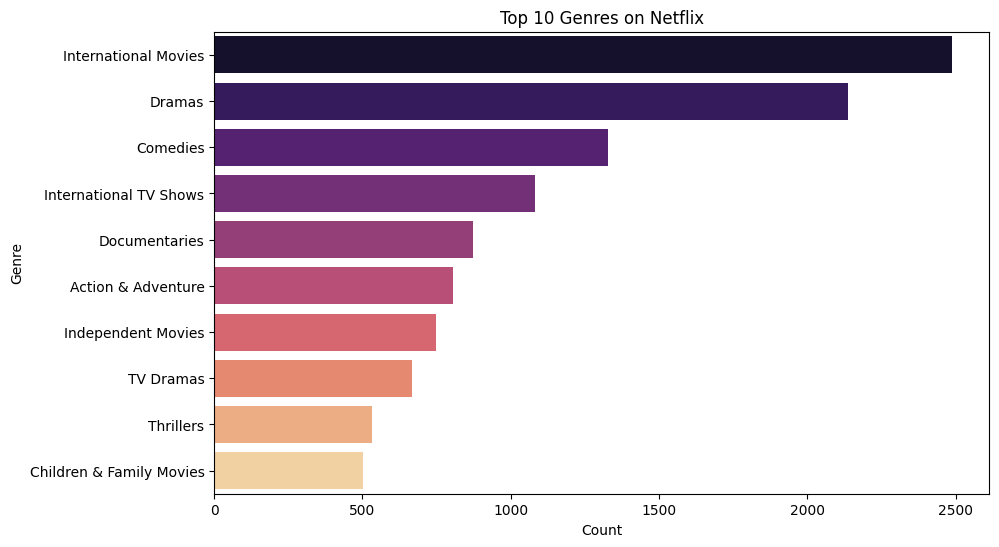

In [26]:
genres = df['listed_in'].str.split(',').explode().str.strip()
top_genres = genres.value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=top_genres.index, x=top_genres.values, palette='magma')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


<Figure size 1000x600 with 0 Axes>

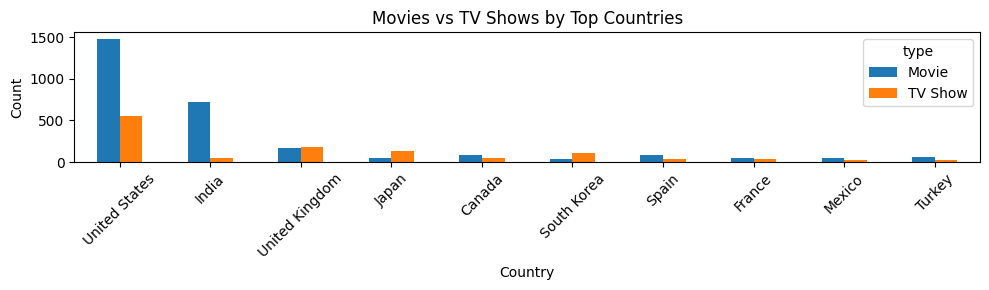

In [28]:
country_type = df_original.groupby(['country','type']).size().unstack(fill_value=0)
top_countries = country_type.sum(axis=1).sort_values(ascending=False).head(10)
country_type_top = country_type.loc[top_countries.index]

plt.figure(figsize=(10,6))
country_type_top.plot(kind='bar', stacked=False, figsize=(10,3))
plt.title('Movies vs TV Shows by Top Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2406109442.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='cool')


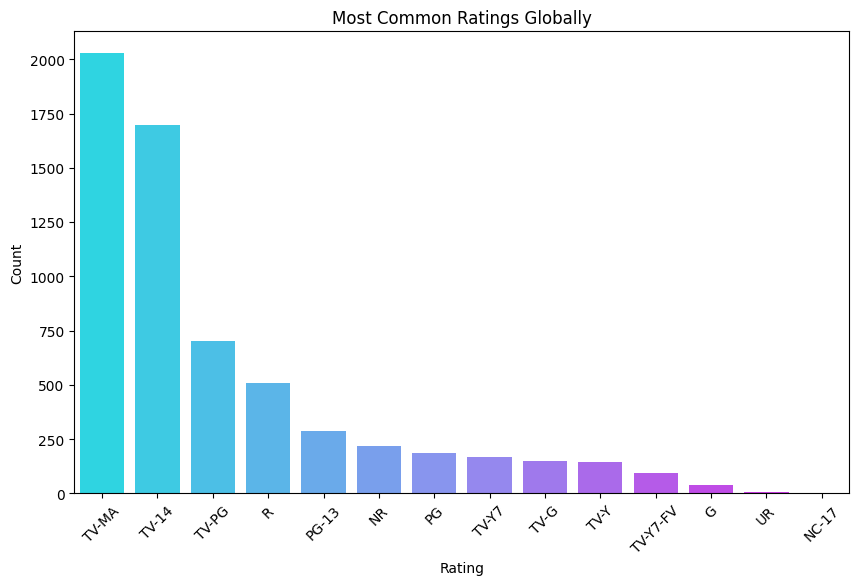

In [29]:
rating_counts = df_original['rating'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='cool')
plt.title('Most Common Ratings Globally')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


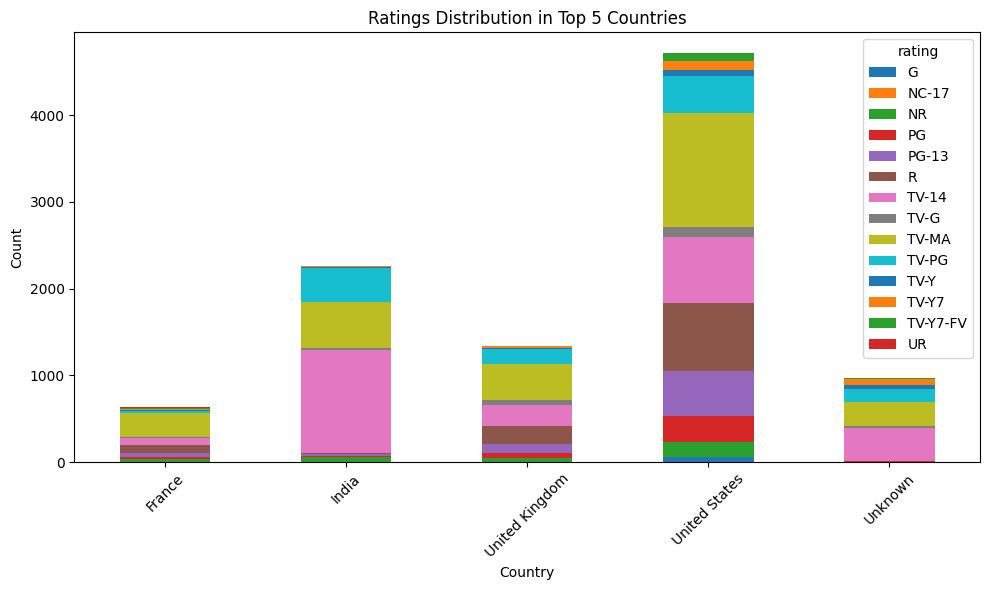

In [20]:
top5_countries = df['country'].value_counts().head(5).index
df_top5 = df[df['country'].isin(top5_countries)]
country_rating = df_top5.groupby(['country','rating']).size().unstack(fill_value=0)

country_rating.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Ratings Distribution in Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1000x300 with 0 Axes>

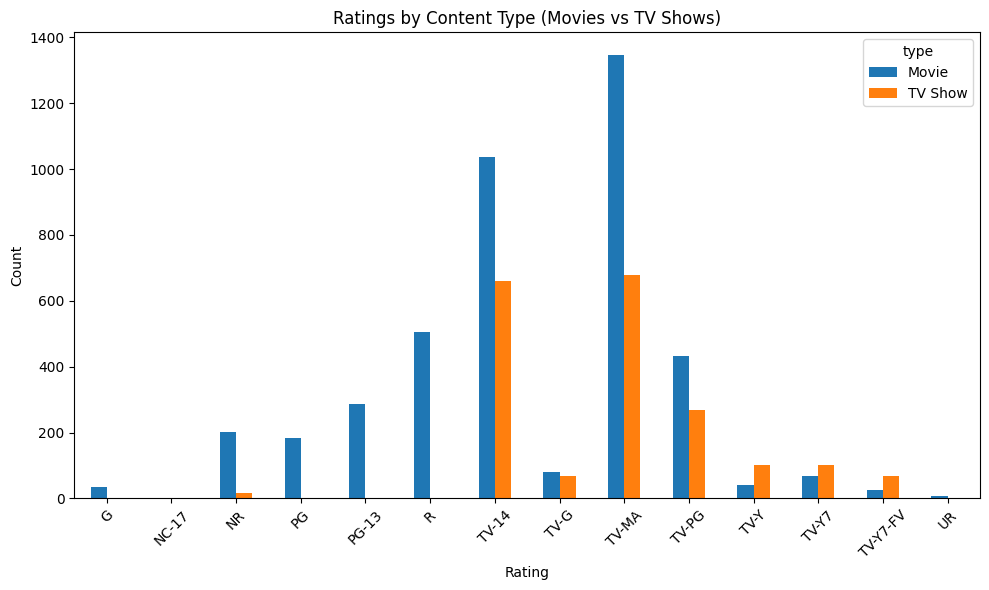

In [30]:
rating_type = df_original.groupby(['type','rating']).size().unstack(fill_value=0).T
plt.figure(figsize=(10,3))
rating_type.plot(kind='bar', figsize=(10,6))
plt.title('Ratings by Content Type (Movies vs TV Shows)')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-4199108768.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.index, y=top_directors.values, palette='plasma')


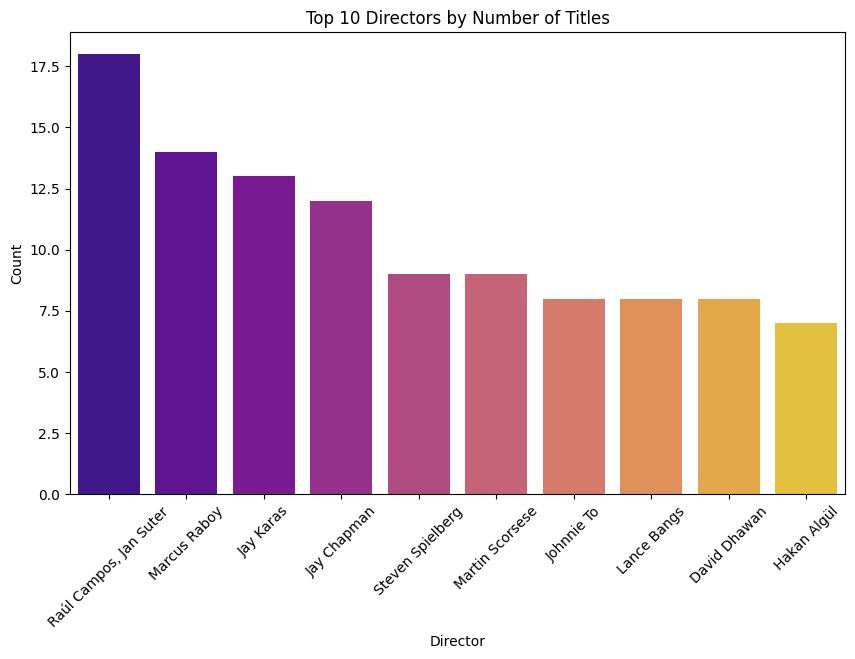

In [31]:
top_directors = df_original['director'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.index, y=top_directors.values, palette='plasma')
plt.title('Top 10 Directors by Number of Titles')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-1978921271.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_actors.index, x=top_actors.values, palette='cividis')


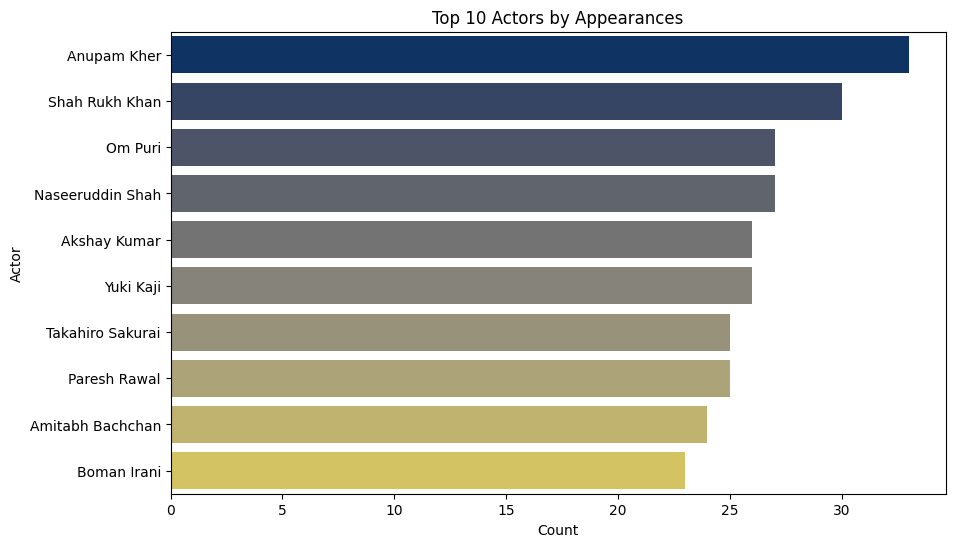

In [32]:
actors = df_original['cast'].dropna().str.split(',').explode().str.strip()
top_actors = actors.value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=top_actors.index, x=top_actors.values, palette='cividis')
plt.title('Top 10 Actors by Appearances')
plt.xlabel('Count')
plt.ylabel('Actor')
plt.show()


/tmp/ipython-input-3681581549.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_duration.index, y=avg_duration.values, palette='crest')


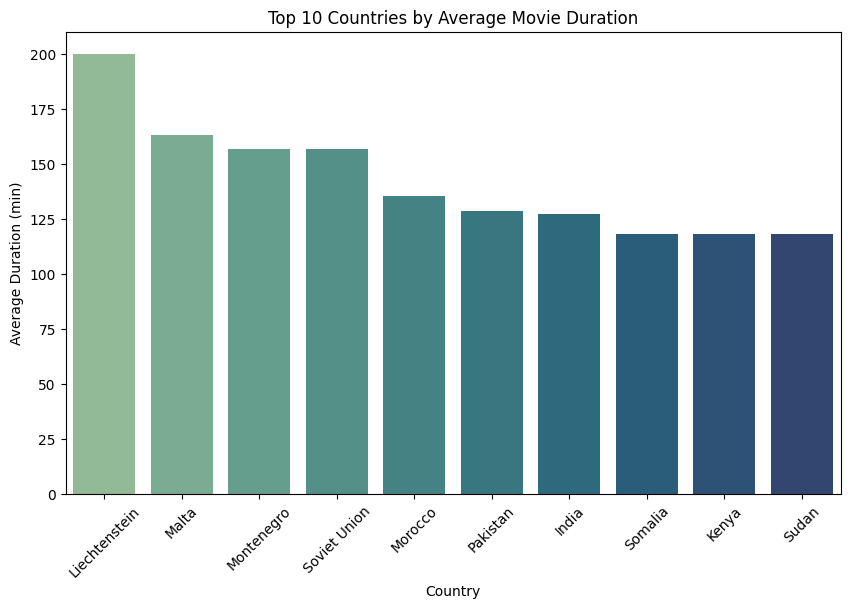

In [37]:
movies = df[df['type'] == 'Movie']
avg_duration = movies.groupby('country')['duration_min'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_duration.index, y=avg_duration.values, palette='crest')
plt.title('Top 10 Countries by Average Movie Duration')
plt.xlabel('Country')
plt.ylabel('Average Duration (min)')
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-1396198746.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_seasons.index, y=avg_seasons.values, palette='rocket')


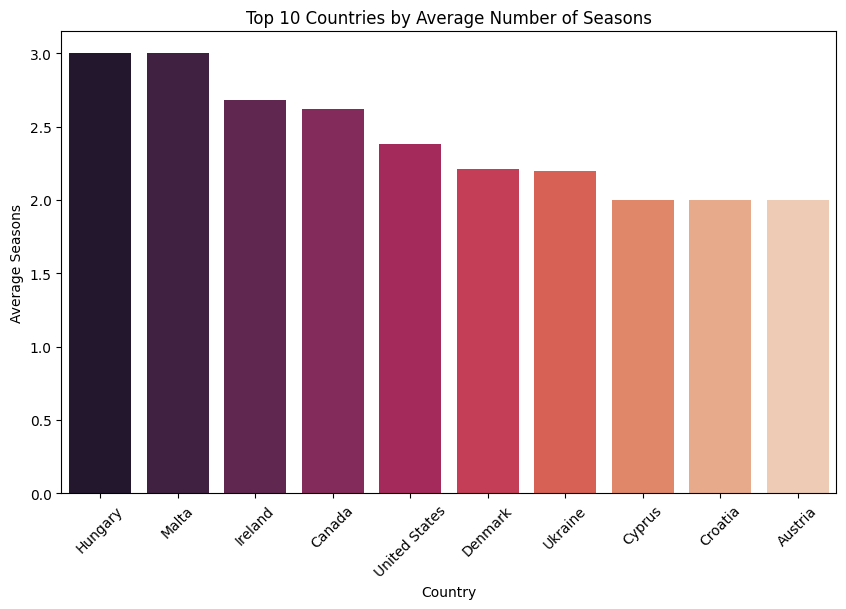

In [39]:
shows = df[df['type'] == 'TV Show']
avg_seasons = shows.groupby('country')['duration_seasons'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_seasons.index, y=avg_seasons.values, palette='rocket')
plt.title('Top 10 Countries by Average Number of Seasons')
plt.xlabel('Country')
plt.ylabel('Average Seasons')
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-2785887185.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='country', y='duration_min', data=movies_us_india, palette='pastel')


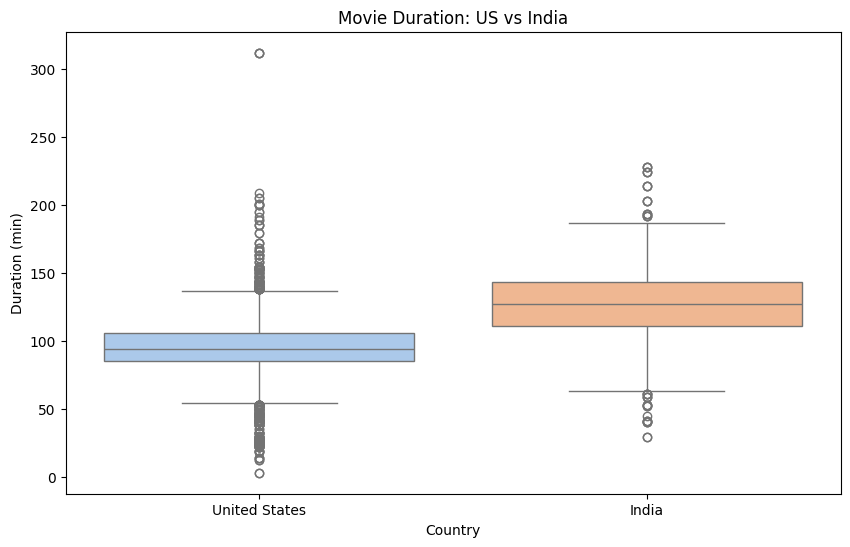

In [40]:
movies_us_india = df[(df['type'] == 'Movie') & (df['country'].isin(['United States','India']))]

plt.figure(figsize=(10,6))
sns.boxplot(x='country', y='duration_min', data=movies_us_india, palette='pastel')
plt.title('Movie Duration: US vs India')
plt.xlabel('Country')
plt.ylabel('Duration (min)')
plt.show()


/tmp/ipython-input-4207531659.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_family_countries.index, y=top_family_countries.values, palette='flare')


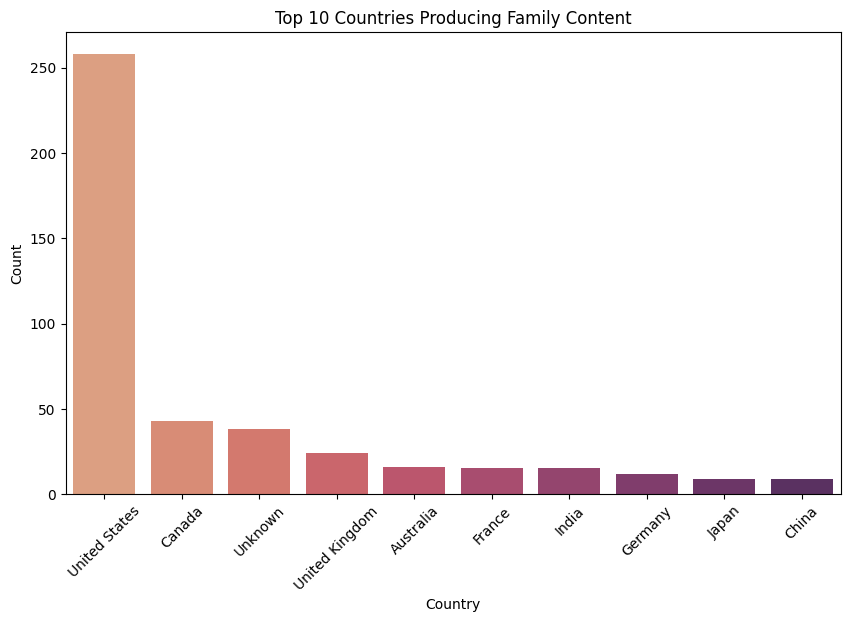

In [44]:
family_content = df[df['listed_in'].str.contains('Family', case=False, na=False)]
top_family_countries = family_content['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_family_countries.index, y=top_family_countries.values, palette='flare')
plt.title('Top 10 Countries Producing Family Content')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


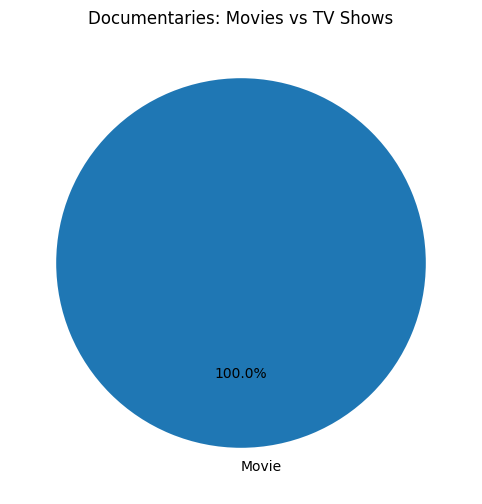

In [45]:
docs = df[df['listed_in'].str.contains('Documentaries', case=False, na=False)]
doc_type_counts = docs['type'].value_counts()

plt.figure(figsize=(10,6))
plt.pie(doc_type_counts, labels=doc_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Documentaries: Movies vs TV Shows')
plt.show()


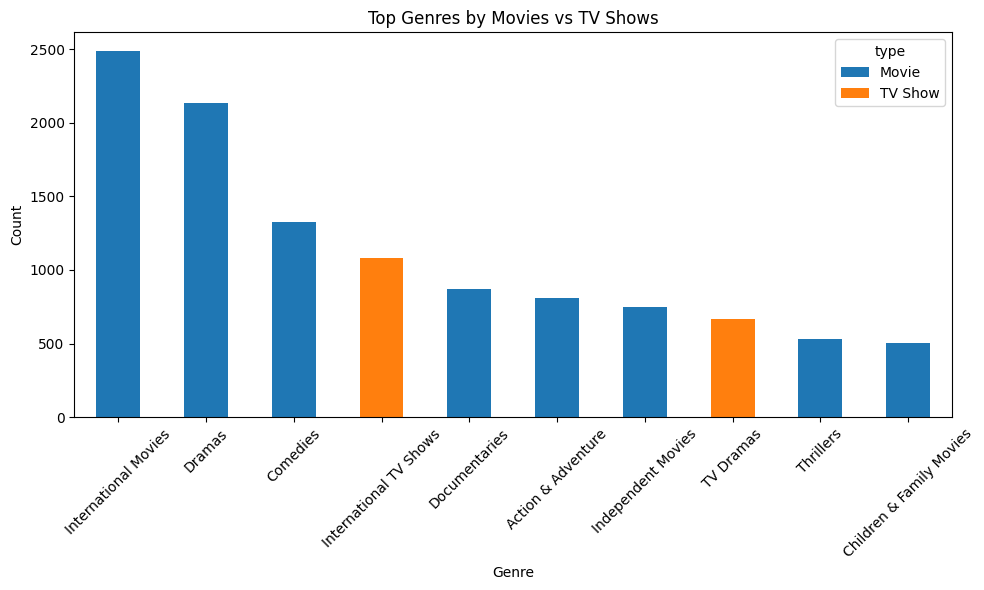

In [46]:
genres_expanded = df.assign(
    genre=df['listed_in'].str.split(',').explode().str.strip()
)

genre_type = genres_expanded.groupby(['genre','type']).size().unstack(fill_value=0)
top_genres = genre_type.sum(axis=1).sort_values(ascending=False).head(10)
genre_type_top = genre_type.loc[top_genres.index]

genre_type_top.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Top Genres by Movies vs TV Shows')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3919194900.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_genres_per_country.index, y=unique_genres_per_country.values, palette='Spectral')


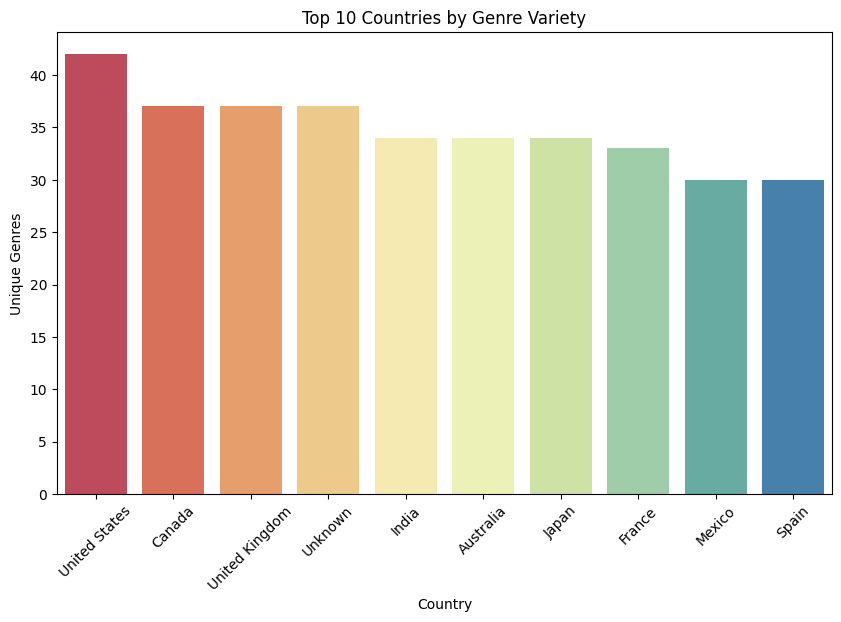

In [47]:
genres_expanded = df.assign(
    genre=df['listed_in'].str.split(',').explode().str.strip()
)

unique_genres_per_country = genres_expanded.groupby('country')['genre'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=unique_genres_per_country.index, y=unique_genres_per_country.values, palette='Spectral')
plt.title('Top 10 Countries by Genre Variety')
plt.xlabel('Country')
plt.ylabel('Unique Genres')
plt.xticks(rotation=45)
plt.show()


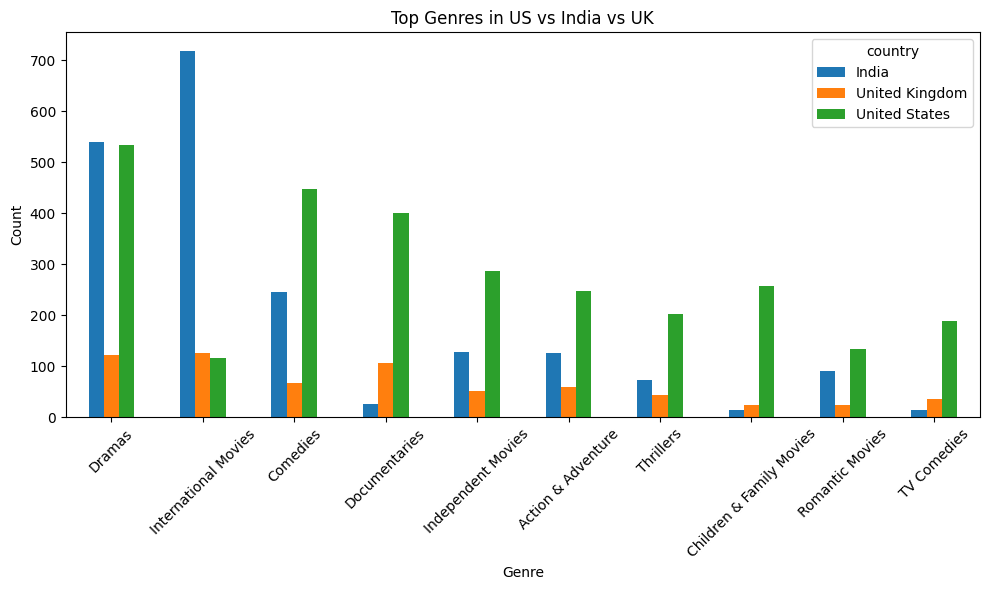

In [50]:
countries_focus = ['United States','India','United Kingdom']
df_focus = df[df['country'].isin(countries_focus)]
genres_expanded = df_focus.assign(
    genre=df_focus['listed_in'].str.split(',').explode().str.strip()
)

country_genre = genres_expanded.groupby(['genre','country']).size().unstack(fill_value=0)
top_genres = country_genre.sum(axis=1).sort_values(ascending=False).head(10)
country_genre_top = country_genre.loc[top_genres.index]

country_genre_top.plot(kind='bar', figsize=(10,6))
plt.title('Top Genres in US vs India vs UK')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2481625483.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_comedy_countries.index, y=top_comedy_countries.values, palette='coolwarm')


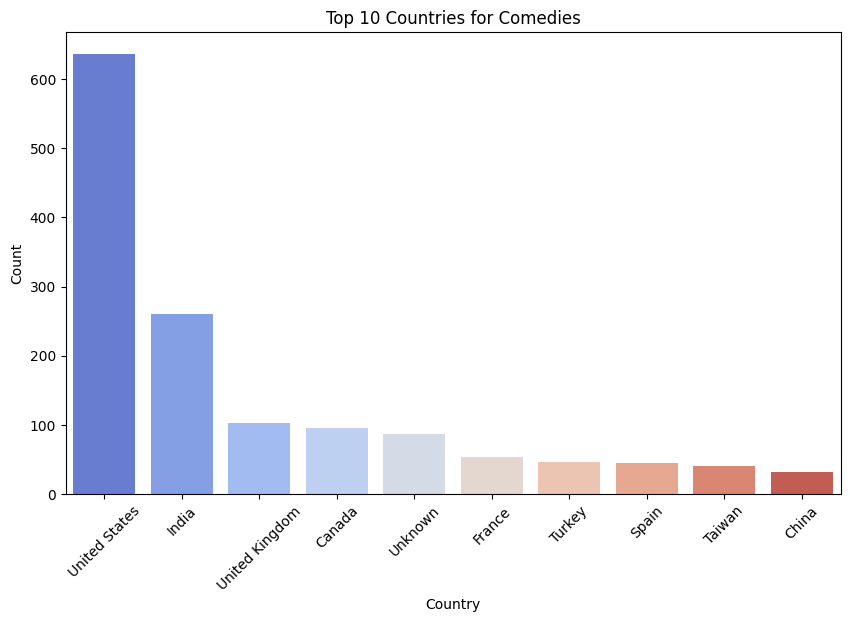

In [51]:
comedies = df[df['listed_in'].str.contains('Comedies', case=False, na=False)]
top_comedy_countries = comedies['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_comedy_countries.index, y=top_comedy_countries.values, palette='coolwarm')
plt.title('Top 10 Countries for Comedies')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [54]:
import plotly.express as px

country_type = df.groupby(['country', 'type']).size().reset_index(name='count')

most_popular_type = country_type.loc[country_type.groupby('country')['count'].idxmax()]

fig = px.choropleth(
    most_popular_type,
    locations="country",
    locationmode="country names",
    color="type",
    hover_name="country",
    hover_data=["count"],
    title="Most Dominant Type (Movies vs TV Shows) by Country on Netflix",
    color_discrete_map={"Movie": "blue", "TV Show": "green"}
)

fig.show()
